<a href="https://colab.research.google.com/github/BintiKadzo/Moringa_DSC14_Week4_IP/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_03_Matilda_Kadzo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DEFINING THE QUESTION**
##a.) Specifying the Data Analytic Question: Problem Statement
Investigate the claim about blue cars from the autolib dtataset

> Null Hypothesis, H0: The average number of blue cars taken is not different from that of blue cars returned.

> Alternative Hypothesis, Ha: The average number of blue cars taken is different from that of blue cars returned.

## b.) Defining the Metric for Success


>  The datas objectives include investigating the claim that's listed above and finding out whether or not the average number of blue cars is taken is not similar/different ti that of blue cars returned.

## c.) Understanding the Context


> As before, we were tasked with understanding how to use the electric car usage by solving other research challenges. As a data scientist at the  electric car-sharing service company Autolib, we investigate the claims about  blue cars from the  Autolib dataset provided. To do this, we need to identify some areas and periods of interest through sampling, show why we need to choose a method, and then perform a hypothesis test on the claims we make.

## d.) Recording the Experimental Design

We need to:
> *  Define the research question
> *  Finding the outliers, anomalies and any missing data within the datased
> *  Plot the univariate and bivariate summaries that record our observations.
> *  Perfome a hypothesis test to implement solution.
> *  Challenge the solution by providing any insights on the imporvements that can eb made.

## e.) Relevance of the data

> The data used in the survey is from an open data source. The dataset provided  is a daily aggregation by date and zip code of the number of events on the Autolib network (car sharing and charging). The dataset used is in the January-July 2018 range and is relevant for this analysis.















# **DATA EXPLORATION**




In [320]:
# Importing all the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [321]:
# Loading the data
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)

In [322]:
# Reading the data by showing the top 5 entries
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [323]:
# Displaying the bottom 5 entires in the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


#**Checking the Data**

In [324]:
# Checking information on the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [325]:
# Displaying the dataset columns
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [326]:
# determining the number of records in the dataset
df.shape

(16085, 13)

The dataset has 16085 rows and 13 columns

In [327]:
# checking the dataset for duplicates
df.duplicated().any()

False

The dataset has no duplicate present.

In [328]:
# checking datasets for missing values
df.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [329]:
df.isnull().sum().sort_values(ascending=False)

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

There are no missing values in the dataset

In [330]:
#  To Count the number of distinct elements in the dataset.
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [331]:
# Finding the Quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#Removing the outliers based on the IQR range 
new_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [332]:
# Display the new dataset
new_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3899,91330,1/1/2018,1440,0,weekday,19,9,0,0,0,0,4,2
3900,91330,1/2/2018,1438,1,weekday,10,10,0,0,0,0,0,0
3901,91330,1/3/2018,1439,2,weekday,11,13,0,0,0,0,1,1
3903,91330,1/5/2018,1440,4,weekday,10,6,0,0,0,0,1,1
3905,91330,1/7/2018,1440,6,weekend,28,17,0,0,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0


The new dataset (new_df) has 9783 rows and 13 columns, therefore 6302 rows have been dropped after removing the outliers

# **EXPLORATORY ANALYSIS**

In [333]:
# Renaming the columns
column = new_df.columns.tolist()
for col in range(len(column)):
  column[col] = column[col].lower().replace(" ", " ")

new_df.columns =  column

In [334]:
# Display the column names
new_df.columns

Index(['postal code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [335]:
# Check the current dataset's shape, i.e rows and columns
new_df.shape

(9783, 13)

In [336]:
# Drop all unnecessary columns
# Unnecessary columns include : 'date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'

new_df.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis = 1, inplace = True)

In [337]:
# View the dataset after dropping the unnecessary columns
new_df

,postal code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


Columns have reduced from 13 to 5 columns

In [338]:
# To display a random sample from the dataset
new_df.sample(15)

,postal code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
9668,92700,6,weekend,113,116
7051,92270,6,weekend,38,47
13934,94150,4,weekday,31,32
6409,92230,2,weekday,46,56
11488,93310,6,weekend,20,21
11476,93310,1,weekday,16,14
9171,92410,6,weekend,15,14
12951,93800,0,weekday,35,33
13346,94110,1,weekday,48,45
10081,93100,5,weekend,166,145


In [339]:
# Extract data based on the day_type
weekday_df = new_df[new_df.day_type == 'weekday']
weekday_df. head()

,postal code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3906,91330,0,weekday,3,1


The selected periods of interest can either be only weekday or weekend not both, therefore we will be working with weekdays as the selected period of interest.


In [340]:
# Check the dimensionality of the weekday dataset 
weekday_df.shape

(6820, 5)

The selected period of interest (weekday) has 6820 rows and 5 columns

In [341]:
# To Count the number of distinct elements in the dataset.
weekday_df.nunique()

postal code               79
dayofweek                  5
day_type                   1
bluecars_taken_sum       245
bluecars_returned_sum    246
dtype: int64

# **Univariate Analysis**

In [342]:
# To obtain the proportion of the day of the week
weekday_df['dayofweek'].value_counts(normalize = True ) * 100

0    22.360704
1    22.287390
2    19.926686
4    18.812317
3    16.612903
Name: dayofweek, dtype: float64

According to the dataset, the days of the week are coded with values (0-4), being Monday and 4 being Friday.

In [343]:
# Describe the numerical variables
weekday_df[['bluecars_taken_sum' , 'bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,6820.000000,6820.000000
mean,45.560557,45.689150
std,44.590618,44.217408
min,0.000000,0.000000
25%,15.000000,15.000000
50%,30.000000,31.000000
75%,61.000000,60.000000
max,291.000000,291.000000


Text(0.5, 1.0, 'Distribution of Taken Blue Cars')

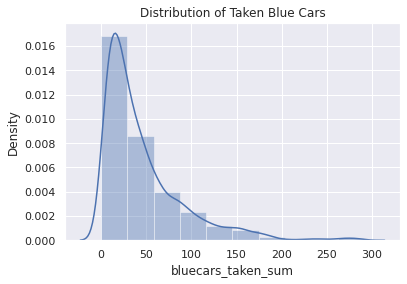

In [344]:
# A distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.
# Using a distplot, plot the taken bluecars
sns.distplot(weekday_df['bluecars_taken_sum'], bins = 10)
plt.title('Distribution of Taken Blue Cars')

Text(0.5, 1.0, 'Distribution of Returned Blue Cars')

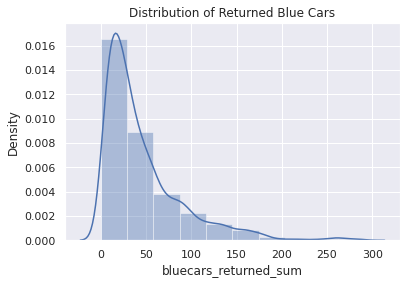

In [345]:
# Using a distplot, plot the returned bluecars
sns.distplot(weekday_df['bluecars_returned_sum'], bins = 10)
plt.title('Distribution of Returned Blue Cars')

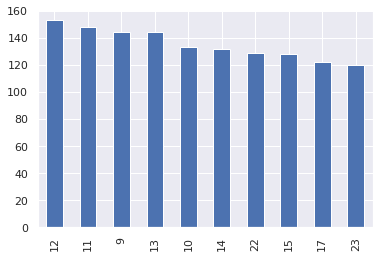

In [346]:
# Plot a bar graph of value counts returned bluecars
weekday_df['bluecars_returned_sum'].value_counts().head(10).plot.bar()

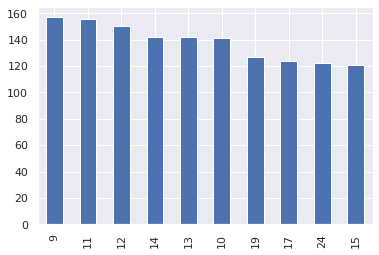

In [347]:
# Plot a bar graph of value counts taken bluecars
weekday_df['bluecars_taken_sum'].value_counts().head(10).plot.bar()

In [318]:
# Change the postal code and day of the week data type from int64 to String
weekday_df[['postal code', 'dayofweek']] = weekday_df[['postal code', 'dayofweek']].apply(str)
print(weekday_df.dtypes)


postal code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


In [349]:
weekday_df

,postal code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3906,91330,0,weekday,3,1
...,...,...,...,...,...
16077,95880,1,weekday,25,25
16078,95880,2,weekday,12,13
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10


# **Bivariate Analysis**

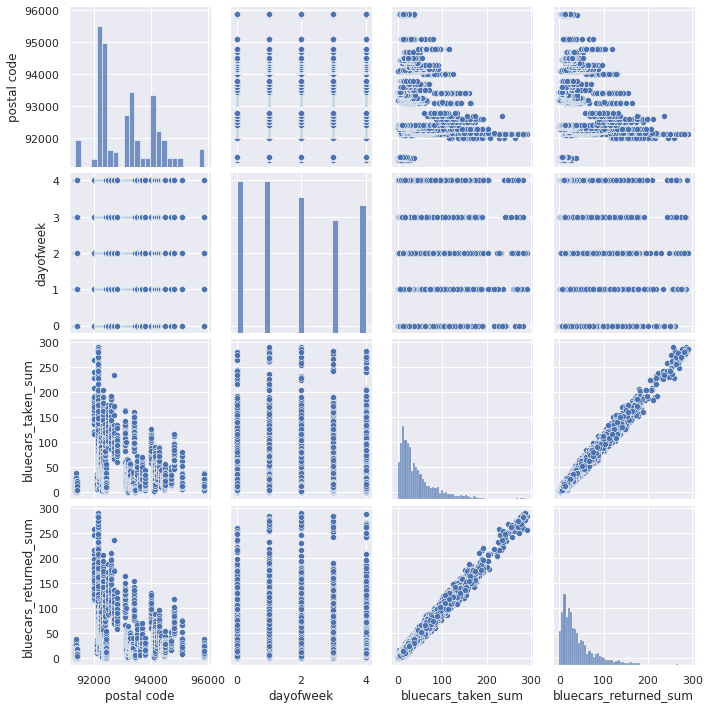

In [350]:
# Ploting the bivariate summaries and recording our observations on scatterplot
sns.pairplot(weekday_df)
plt.show()


<Figure size 1080x720 with 0 Axes>

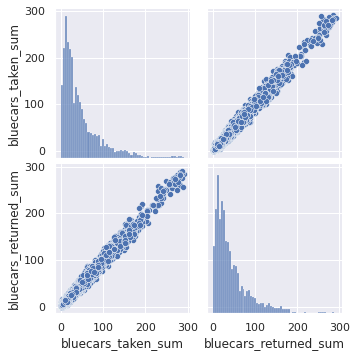

In [351]:
# Determining the correlation between the numeric features
plt.figure(figsize=(15,10))
sns.pairplot(weekday_df[['bluecars_taken_sum','bluecars_returned_sum']])
# plt.title('Taken_Bluecars vs Returned_Bluecars')

In [352]:
# Compute pairwise correlation of columns, excluding NA/null values.
weekday_df['bluecars_taken_sum'].corr(weekday_df['bluecars_returned_sum'])


0.9927049480882781

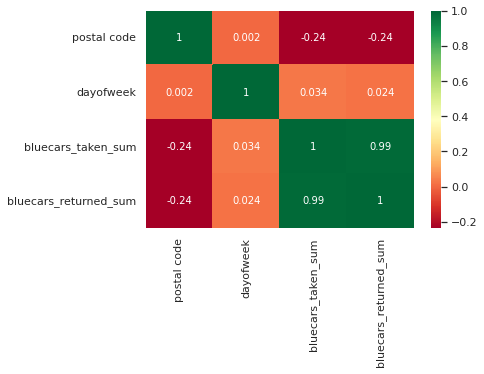

In [353]:
# Displaying dataframe correlation as an heatmap 
sns.heatmap(weekday_df.corr(),cmap ='RdYlGn', annot = True)
plt.show()

# **IMPLEMENTING THE SOLUTION**

# Hypothesis Testing



> **Null Hypothesis, H0**: The average number of blue cars taken is not different from that of blue cars returned.

> **Alternative Hypothesis, Ha**: The average number of blue cars taken is different from that of blue cars returned.




In [354]:
# Display the columns in the dataset
weekday_df.columns

Index(['postal code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [355]:
# Check the weekday dataset datatypes
weekday_df.dtypes

postal code               int64
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [356]:
# Drop the day type column, since it only has a constant value.
weekday_df.drop(['day_type'], axis = 1, inplace = True)
weekday_df.head()

,postal code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,19,9
3900,91330,1,10,10
3901,91330,2,11,13
3903,91330,4,10,6
3906,91330,0,3,1


In [357]:
# Visualize the styling code
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [358]:
# Turn off the warnings
warnings.filterwarnings('ignore')

In [359]:
# Count the number of entires in the weekday dataset
weekday_df.count()

postal code              6820
dayofweek                6820
bluecars_taken_sum       6820
bluecars_returned_sum    6820
dtype: int64

## NORMALITY TESTS

In [360]:
# The Shapiro-Wilk test is a statistical test used to check if a continuous variable follows a normal distribution.
# import Shapiro
from scipy.stats import shapiro

def shapiro_test(weekday_df , col_list):
  for x in col_list:
    print(x)
    data = weekday_df[x]
    stst, p = shapiro(data)
    print('Statistics = %/3f. p = %.3f' % (stat , p))


# To interpret the data
    alpha = 0.05
    if p > alpha:
      print('The Sample looks Gaussian, therefore, the data is normal (fail to reject H0)')
    else:
      print('The Sample does not Gaussian, the data is not normal  (reject H0)')
    print('\n')

In [361]:
# Import all the required libraries and packages.
# Import scipy.stats that specializes in random variables and probability distributions
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# To time the processes
import time

# To suppress warnings
import warnings

# For data manipulation
import numpy as np

# For Dataframe Manipulation
import pandas as pandas

# For visualizations
import matplotlib.pyplot as ply
%matplotlib inline

import seaborn as sns
sns.set()

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# To scale the dataser=t
from sklearn.preprocessing import StandardScaler 
# For data clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture

 # For os related operations
import os                    
import sys  


# **Stratified Sampling**

In [362]:
# Getting a stratified sample
strat_df =  weekday_df.groupby('dayofweek' , group_keys = False). apply(lambda grouped_subset : grouped_subset.sample(frac = 0.1))
strat_df

,postal code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
15028,94450,0,7,8
14822,94340,0,28,36
14770,94340,0,43,33
9541,92600,0,126,131
9172,92410,0,9,12
...,...,...,...,...
10625,93170,4,46,50
10020,93100,4,105,111
13622,94130,4,32,32
8798,92390,4,15,18


**Bluecars Taken**

In [377]:
 # sample mean of taken bluecars
st_mean = weekday_df['bluecars_taken_sum'].mean()
st_mean   

45.560557184750735

In [379]:
 # population mean of taken bluecars
pt_mean = df['BlueCars_taken_sum'].mean()
pt_mean                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

125.92695057506994

In [380]:
# Sample standard deviation of bluecars taken
std_devt = weekday_df['bluecars_taken_sum'].std()
std_devt

44.59061799374325

In [386]:
# calculating Z-score for the taken bluecars
zscore_t = (st_mean-pt_mean) / std_devt
zscore_t

-1.8023162047584953

In [389]:
# calculating the p value or taken bluecars
from scipy.stats import norm
pvalue_t = stats.norm.cdf(zscore_t)
pvalue_t

0.035747835211320834

In [394]:
# Interpretation of the p value for taken bluecars
alpha = 0.05 
if pvalue_t < 0.05:
  print ("Our p value is,", pvalue_t,", We will therefore be rejecting the null hypothesis")
else:
  print("Our p value is,", pvalue_t," We will fail to reject the null hypothesis")

Our p value is, 0.035747835211320834 , We will therefore be rejecting the null hypothesis


In [398]:
# point estimation - finding an approximate value of the mean
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

pt_mean - st_mean

80.3663933903192

In [ ]:
# Get the z-critical value
z_critical = stats.norm.ppf(q = 0.975)  

# Check the z-critical value
print("z-critical value:",z_critical)      

In [405]:
# Get the population standard deviation
import math
margin_of_error = z_critical * (std_devt/math.sqrt(296))

confidence_interval = (st_mean - margin_of_error,
                       st_mean + margin_of_error)  

print("Confidence interval:", confidence_interval)

Confidence interval: (40.48076755793009, 50.640346811571376)


**Bluecars Returned**

In [378]:
 # population mean of returned bluecars
pr_mean = df['BlueCars_returned_sum'].mean()
pr_mean                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

125.912713708424

In [376]:
# sample mean of returned bluecars
sr_mean = weekday_df['bluecars_returned_sum'].mean()
sr_mean    

45.6891495601173

In [381]:
# Sample standard deviation of bluecars returned
std_devr = weekday_df['bluecars_returned_sum'].std()
std_devr

44.21740839004471

In [385]:
# calculating Z-score for the returned bluecars
zscore_r = (sr_mean-pr_mean) / std_devr
zscore_r

-1.8142981931606954

In [387]:
# calculating the p value or returned bluecars
from scipy.stats import norm
pvalue_r = stats.norm.cdf(zscore_r)
pvalue_r

0.034815914798157765

In [395]:
# Interpretation of the p value for returned bluecars
alpha = 0.05 
if pvalue_r < 0.05:
  print ("Our p value is,", pvalue_r,", We will therefore be rejecting the null hypothesis")
else:
  print("Our p value is,", pvalue_r," We will fail to reject the null hypothesis")

Our p value is, 0.034815914798157765 , We will therefore be rejecting the null hypothesis


In [399]:
# we will use the mean for the blue cars that were returned
pr_mean - sr_mean

80.22356414830669

In [402]:
# Get the z-critical value
z_critical = stats.norm.ppf(q = 0.975)  

# Check the z-critical value
print("z-critical value:",z_critical)              

z-critical value: 1.959963984540054
1.959963984540054


In [406]:
# Get the population standard deviation of bluecars returned
import math
margin_of_error = z_critical * (std_devr/math.sqrt(296))

confidence_interval = (pr_mean - margin_of_error,
                       pr_mean + margin_of_error)  

print("Confidence interval:", confidence_interval)

Confidence interval: (120.8754403408255, 130.9499870760225)


# **CLUSTER SAMPLING**

<function matplotlib.pyplot.show>

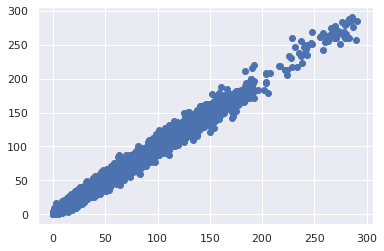

In [407]:
# Cluster Sampling for taken bluecars
plt.scatter(weekday_df['bluecars_taken_sum'],weekday_df['bluecars_returned_sum'])
plt.show

<function matplotlib.pyplot.show>

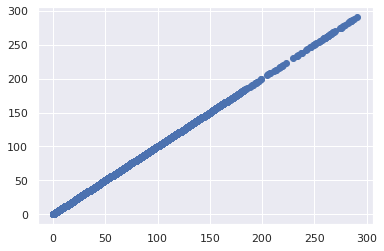

In [408]:
# cluster sampling for returned bluecars
plt.scatter(weekday_df['bluecars_returned_sum'],weekday_df['bluecars_returned_sum'])
plt.show

In [414]:
# integer-location based indexing for selection by position by using iloc
iloc = weekday_df.iloc[:, 2:4]
iloc

,bluecars_taken_sum,bluecars_returned_sum
3899,19,9
3900,10,10
3901,11,13
3903,10,6
3906,3,1
...,...,...
16077,25,25
16078,12,13
16079,15,13
16080,15,10


In [416]:
# Compute k-meand clustering
kmeans = KMeans (5)
kmeans.fit(iloc)

KMeans(n_clusters=5)

In [417]:
# Predict the closest cluster each sample in X belongs to
identified_clusters = kmeans.fit_predict(iloc)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [418]:
# Predict the closest cluster each sample in X belongs to.
kmeans.cluster_centers_


array([[ 89.39957035,  89.38882922],
       [ 15.60248627,  16.04278693],
       [148.59465479, 147.77951002],
       [ 46.67939331,  46.58838912],
       [254.39130435, 253.        ]])

In [419]:
#  Measuring how well a dataset was clustered by K-Means
kmeans.inertia_

1754266.0535850893

In [421]:
# Let's create a copy of the current data we have
copy_df = weekday_df.copy()

# Create a new Series, containing the identified cluster for each observation
copy_df['Cluster'] = identified_clusters

# Check the result
copy_df

,postal code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,Cluster
3899,91330,0,19,9,1
3900,91330,1,10,10,1
3901,91330,2,11,13,1
3903,91330,4,10,6,1
3906,91330,0,3,1,1
...,...,...,...,...,...
16077,95880,1,25,25,1
16078,95880,2,12,13,1
16079,95880,3,15,13,1
16080,95880,4,15,10,1


In [422]:
# Scaling of the data
ss = StandardScaler()
ss.fit_transform(copy_df)

array([[-1.75289462, -1.31746294, -0.59569716, -0.8298053 , -0.48652615],
       [-1.75289462, -0.61379803, -0.79754814, -0.80718811, -0.48652615],
       [-1.75289462,  0.08986688, -0.77512026, -0.73933655, -0.48652615],
       ...,
       [ 2.74918433,  0.79353179, -0.68540871, -0.73933655, -0.48652615],
       [ 2.74918433,  1.4971967 , -0.68540871, -0.80718811, -0.48652615],
       [ 2.74918433, -1.31746294, -0.77512026, -0.71671937, -0.48652615]])

In [423]:
# Create a function
def plot_gmm( X, nclust = 2,label=True):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(iloc)
    clust_labels = model.predict(iloc)
    return (clust_labels)

clust_labels = plot_gmm(copy_df,2)
gmm = pd.DataFrame(clust_labels)
copy_df.insert((copy_df.shape[1]),'gmm',gmm)

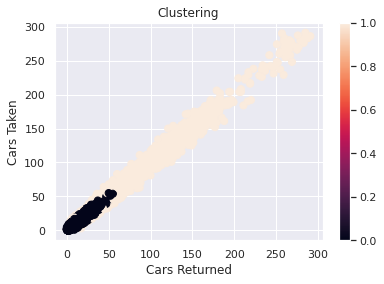

In [424]:
# Plotting obtained cluster using gmm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(copy_df['bluecars_returned_sum'],copy_df['bluecars_taken_sum'],
                     c=gmm[0],s=50)
ax.set_title('Clustering')
ax.set_xlabel('Cars Returned')
ax.set_ylabel('Cars Taken')
plt.colorbar(scatter)

# **CONCLUSION**


> We fail to reject the null hypothesis because there is not sufficient evidence to prove that the average mean of blue cars taken and those returned are not equal.
